In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
data.head

<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

In [ ]:
data.shape

(145460, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [ ]:
data=data[(data["RainTomorrow"]=="Yes")|(data["RainTomorrow"]=="No")]

In [ ]:
numeric_col=data.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
cat_col=data.select_dtypes(include="object").columns
cat_col

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
for col in cat_col:
    print(f"{col}: {data[col].nunique()}")

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [ ]:
data["Date"]=pd.to_datetime(data["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

data.drop("Date",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.duplicated().sum()

0

In [ ]:
s=data["RainTomorrow"].value_counts()

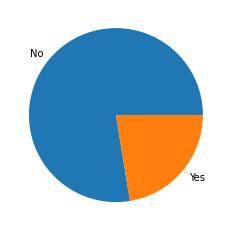

In [ ]:
plt.pie(s,labels=s.index);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data["RainTomorrow"].replace({"No":0,"Yes":1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
X=data.drop("RainTomorrow",axis=1)
y=data["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_col=X_train.select_dtypes(include="object").columns
cat_col

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [ ]:
X_train[cat_col].isnull().sum()/len(data)*100

Location       0.000000
WindGustDir    5.244984
WindDir9am     5.651474
WindDir3pm     2.125984
RainToday      0.831265
dtype: float64

In [ ]:
X_test[cat_col].isnull().sum()/len(data)*100

Location       0.000000
WindGustDir    1.316521
WindDir9am     1.390364
WindDir3pm     0.530968
RainToday      0.157532
dtype: float64

In [ ]:
for col in cat_col:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

In [ ]:
for col in cat_col:
    print(X_train[col].nunique())

49
16
16
16
2


In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True,columns=cat_col)
X_test=pd.get_dummies(X_test,drop_first=True,columns=cat_col)

In [ ]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday_Yes'],
      dtype='object', length=113)

In [ ]:
numeric_col=X_train.select_dtypes(include="float64").columns
numeric_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
X_train[numeric_col].isnull().sum()/len(data)*100

MinTemp           0.369216
MaxTemp           0.188476
Rainfall          0.831265
Evaporation      34.313222
Sunshine         38.219181
WindGustSpeed     5.208414
WindSpeed9am      0.761641
WindSpeed3pm      1.483195
Humidity9am       0.998643
Humidity3pm       2.048624
Pressure9am       7.916705
Pressure3pm       7.894200
Cloud9am         30.269423
Cloud3pm         32.186535
Temp9am           0.517606
Temp3pm           1.551413
dtype: float64

In [ ]:
X_test[numeric_col].isnull().sum()/len(data)*100

MinTemp          0.078766
MaxTemp          0.037977
Rainfall         0.157532
Evaporation      8.475804
Sunshine         9.473743
WindGustSpeed    1.310894
WindSpeed9am     0.186366
WindSpeed3pm     0.366403
Humidity9am      0.248957
Humidity3pm      0.490179
Pressure9am      1.938914
Pressure3pm      1.938211
Cloud9am         7.465909
Cloud3pm         7.965934
Temp9am          0.118149
Temp3pm          0.365700
dtype: float64

In [ ]:
for col in numeric_col:
    X_train[col].fillna(X_train[col].median(),inplace=True)
    X_test[col].fillna(X_train[col].median(),inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import  f_regression
UnivariateFeatureSelection = SelectKBest(f_regression, k=50).fit(X_train, y_train)
x_train_k_best = UnivariateFeatureSelection.transform(X_train)
x_test_k_best = UnivariateFeatureSelection.transform(X_test)
#y_train_k_best = UnivariateFeatureSelection.transform(y_train)
#y_test_k_best = UnivariateFeatureSelection.transform(y_test)
print("Shape of original data: ", X_train.shape)
print("Shape of corpus with best features: ", x_train_k_best.shape)

Shape of original data:  (113754, 113)
Shape of corpus with best features:  (113754, 50)


In [ ]:
#@
X_train_k=pd.DataFrame(x_train_k_best)
X_test_k=pd.DataFrame(x_test_k_best)
type(X_train_k)

pandas.core.frame.DataFrame

In [ ]:
#@
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
scaled.fit(x_train_k_best)

train_k=scaled.transform(x_train_k_best)
test_k=scaled.transform(x_test_k_best)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
scaled.fit(X_train)

train=scaled.transform(X_train)
test=scaled.transform(X_test)

X_train=pd.DataFrame(X_train,columns=X_train.columns)
X_test=pd.DataFrame(X_test,columns=X_test.columns)

In [ ]:
#@

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(113754, 113)

In [ ]:
X_train[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,113754.0,12.175225,6.384019,-8.5,7.6,12.0,16.8,33.9
MaxTemp,113754.0,23.221349,7.109859,-4.8,17.9,22.6,28.2,48.1
Rainfall,113754.0,2.323285,8.425833,0.0,0.0,0.0,0.6,371.0
Evaporation,113754.0,5.183036,3.213743,0.0,4.0,4.8,5.4,145.0
Sunshine,113754.0,7.993989,2.758049,0.0,8.2,8.4,8.7,14.5
WindGustSpeed,113754.0,39.895063,13.127684,6.0,31.0,39.0,46.0,135.0
WindSpeed9am,113754.0,13.984704,8.842558,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,113754.0,18.633252,8.709156,0.0,13.0,19.0,24.0,87.0
Humidity9am,113754.0,68.839434,18.944168,0.0,57.0,70.0,83.0,100.0
Humidity3pm,113754.0,51.480317,20.531492,0.0,37.0,52.0,65.0,100.0


In [ ]:
for col in ["Rainfall","Evaporation","WindSpeed9am","WindSpeed3pm"]:
    q1=np.quantile(X_train[col],0.25)
    q3=np.quantile(X_train[col],0.75)
    iqr=q3-q1
    
    lower=round(q1-1.5*iqr,2)
    upper=round(q3+1.5*iqr,2)
    
    print(f"{col}: |upper: {upper} |lower: {lower}")

Rainfall: |upper: 1.5 |lower: -0.9
Evaporation: |upper: 7.5 |lower: 1.9
WindSpeed9am: |upper: 37.0 |lower: -11.0
WindSpeed3pm: |upper: 40.5 |lower: -3.5


In [ ]:
X_train=X_train[(X_train[col]<upper)&(X_train[col]>lower)]
X_test=X_test[(X_test[col]<upper)&(X_test[col]>lower)]

In [ ]:
train=pd.concat([X_train,y_train],axis=1,join="inner")
test=pd.concat([X_test,y_test],axis=1,join="inner")

In [ ]:
train["WindSpeed_diff"]=train["WindSpeed3pm"]-train["WindSpeed9am"]
train["Humidity_diff"]=train["Humidity3pm"]-train["Humidity9am"]
train["Pressure_diff"]=train["Pressure3pm"]-train["Pressure9am"]
train["Cloud_diff"]=train["Cloud3pm"]-train["Cloud9am"]
train["Temp_diff"]=train["Temp3pm"]-train["Temp9am"]
train["MinMax_diff"]=train["MaxTemp"]-train["MinTemp"]

test["WindSpeed_diff"]=test["WindSpeed3pm"]-test["WindSpeed9am"]
test["Humidity_diff"]=test["Humidity3pm"]-test["Humidity9am"]
test["Pressure_diff"]=test["Pressure3pm"]-test["Pressure9am"]
test["Cloud_diff"]=test["Cloud3pm"]-test["Cloud9am"]
test["Temp_diff"]=test["Temp3pm"]-test["Temp9am"]
test["MinMax_diff"]=test["MaxTemp"]-test["MinTemp"]

In [ ]:
col=['MinTemp', 'MaxTemp', 'WindSpeed9am','WindSpeed3pm', 
     'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm','RainTomorrow']

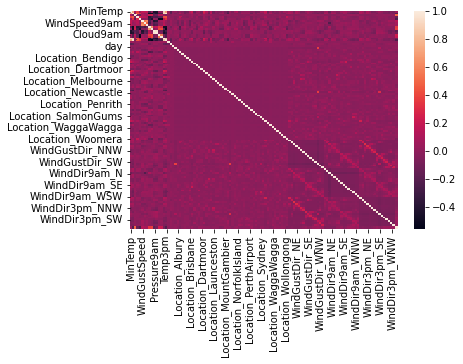

In [ ]:
import seaborn as sns
sns.heatmap(X_train.corr(),annot=True);#train[col]

In [ ]:
n_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff","Temp_diff",
       "MinMax_diff",'RainTomorrow']

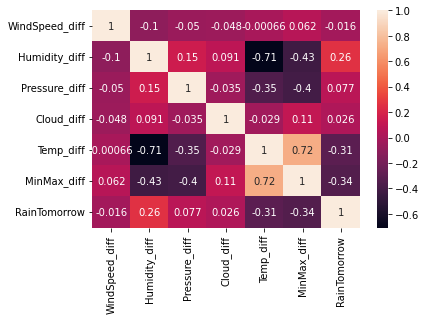

In [ ]:
sns.heatmap(train[n_col].corr(),annot=True);

In [ ]:
drop_col=["WindSpeed_diff","Humidity_diff","Pressure_diff","Cloud_diff",
          "MinTemp", "MaxTemp","Temp9am", "Temp3pm","RainTomorrow"]

In [ ]:
X_train=train.drop(drop_col,axis=1)
y_train=train["RainTomorrow"]

X_test=test.drop(drop_col,axis=1)
y_test=test["RainTomorrow"]

In [ ]:
train_k.shape

(113754, 50)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [ ]:
X_train.shape[1]

111

In [ ]:
model=Sequential()
model.add(Dense(units=20,input_dim=111,activation="relu"))
model.add(Dense(units=16,activation="relu"))#10
#model.add(Dropout(0.1))
model.add(Dense(units=3,activation="relu"))
#model.add(Dropout(0.1))
#model.add(Dense(units=1,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                2240      
                                                                 
 dense_5 (Dense)             (None, 16)                336       
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 2,631
Trainable params: 2,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystopping=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,restore_best_weights=True)

In [ ]:
opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:

history = model.fit(X_train,y_train,batch_size=64,epochs=20)

In [ ]:
X_train, X_test, y_train, y_test
history = model.fit(X_train,y_train,batch_size=64,epochs=20,
                      callbacks=[earlystopping])

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,
                      callbacks=[earlystopping],validation_data=(X_test,y_test))

Epoch 1/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.5143 - accuracy: 0.7837 - val_loss: 0.4227 - val_accuracy: 0.8191
Epoch 2/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.4066 - accuracy: 0.8251 - val_loss: 0.4031 - val_accuracy: 0.8254
Epoch 3/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3872 - accuracy: 0.8347 - val_loss: 0.3842 - val_accuracy: 0.8366
Epoch 4/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8396 - val_loss: 0.4100 - val_accuracy: 0.8188
Epoch 5/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3733 - accuracy: 0.8400 - val_loss: 0.3728 - val_accuracy: 0.8399
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8422 - val_loss: 0.3804 - val_accuracy: 0.8355
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8424 - val_loss: 0.3827 - val_accuracy:

In [ ]:
history_df = pd.DataFrame(history.history)

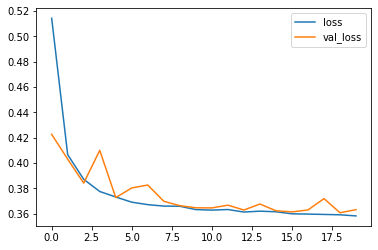

In [ ]:
history_df[["loss","val_loss"]].plot();

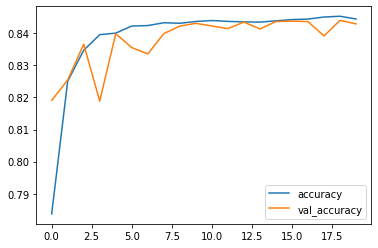

In [ ]:
history_df[["accuracy","val_accuracy"]].plot();

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:
print(f"f1 score: {f1_score(y_test,y_pred)}")

f1 score: 0.5245997088791847


In [ ]:
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[15878   543]
 [ 2723  1802]]


In [ ]:
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

classification_report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     21809
           1       0.70      0.50      0.58      6118

    accuracy                           0.84     27927
   macro avg       0.78      0.72      0.74     27927
weighted avg       0.83      0.84      0.83     27927



In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)

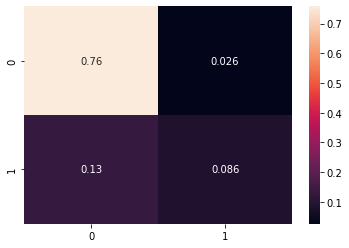

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True)

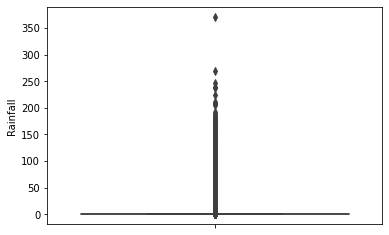

In [ ]:
sns.boxplot(y=X_train['Rainfall']);

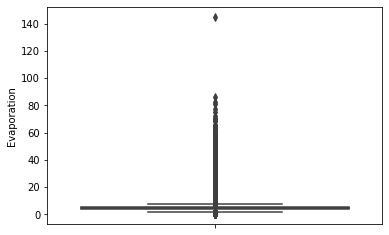

In [ ]:
sns.boxplot(y=X_train['Evaporation']);

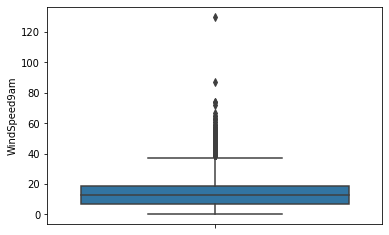

In [ ]:
sns.boxplot(y=X_train['WindSpeed9am']);

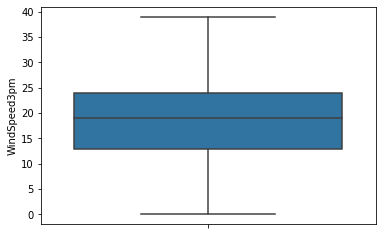

In [ ]:
sns.boxplot(y=X_train['WindSpeed3pm']);